In [9]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import pickle

In [31]:
with open('../Data/train_data_ACSF.pickle', 'rb') as handle:
    train_data = pickle.load(handle)
with open('../Data/val_data_ACSF.pickle', 'rb') as handle:
    val_data = pickle.load(handle)
with open('../Data/test_data_ACSF.pickle', 'rb') as handle:
    test_data = pickle.load(handle)

In [3]:
def get_dist(data):
    bond_dist,couping_dist = [],[]
    for dict_ in data:
        bond_dist.append(dict_['edge_attr'][:,0].numpy())
        couping_dist.append(dict_['edge_attr4'].numpy())
    return np.concatenate(bond_dist),np.concatenate(couping_dist)

In [4]:
train_d1,train_d2 = get_dist(train_data)
test_d1,test_d2 = get_dist(test_data)

(array([8.38160e+04, 7.61272e+05, 3.18260e+04, 4.67800e+04, 7.01520e+04,
        1.78644e+05, 3.04610e+05, 2.28882e+05, 8.60000e+02, 2.40000e+01]),
 array([0.9587291, 1.0400579, 1.1213868, 1.2027155, 1.2840444, 1.3653731,
        1.446702 , 1.5280308, 1.6093596, 1.6906884, 1.7720172],
       dtype=float32),
 <a list of 10 Patch objects>)

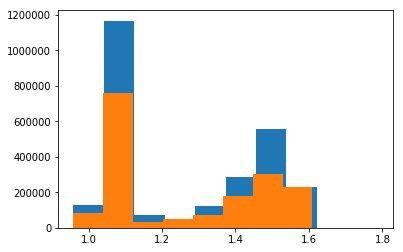

In [5]:
plt.hist(train_d1)
plt.hist(test_d1)

(array([4.04804e+05, 2.21800e+03, 2.26748e+05, 6.49612e+05, 2.82302e+05,
        3.91531e+05, 3.37865e+05, 2.07357e+05, 3.10300e+03, 2.00000e+00]),
 array([1.0022241, 1.3413199, 1.6804159, 2.0195117, 2.3586075, 2.6977034,
        3.0367992, 3.3758953, 3.714991 , 4.0540867, 4.3931828],
       dtype=float32),
 <a list of 10 Patch objects>)

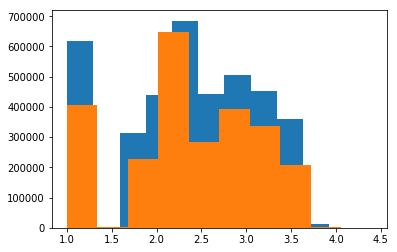

In [6]:
plt.hist(train_d2)
plt.hist(test_d2)

In [7]:
n_points = 25
start1, stop1 = 0.6, 1.6
start2, stop2 = 1.0, 3.8

In [10]:
offset1 = torch.linspace(start1,stop1,n_points)[None,:]
coeff1 = -0.5/torch.pow(offset1[0,0] - offset1[0,1], 2)
offset2 = torch.linspace(start2,stop2,n_points)[None,:]
coeff2 = -0.5/torch.pow(offset2[0,0] - offset2[0,1], 2)

In [32]:
def expand_basis_on_dist(data):
    for dict_ in data:
        bond_dist=(dict_['edge_attr'][:,0])[:,None]
        couping_dist=(dict_['edge_attr4'])
        gauss1 = torch.exp(coeff1 * torch.pow((bond_dist-offset1), 2))
        gauss2 = torch.exp(coeff2 * torch.pow((couping_dist-offset2), 2))
        dict_['edge_attr'] = torch.cat([dict_['edge_attr'],gauss1],1)
        dict_['edge_attr4'] = torch.cat([dict_['edge_attr4'],gauss2],1)

In [33]:
expand_basis_on_dist(train_data)
expand_basis_on_dist(val_data)
expand_basis_on_dist(test_data)

In [34]:
with open('../Data/train_data_ACSF_expand.pickle', 'wb') as handle:
    pickle.dump(train_data, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../Data/val_data_ACSF_expand.pickle', 'wb') as handle:
    pickle.dump(val_data, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../Data/test_data_ACSF_expand.pickle', 'wb') as handle:
    pickle.dump(test_data, handle, protocol=pickle.HIGHEST_PROTOCOL)